# MNIST - Shallow Neural Network

In [41]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

Each sample is  28 x 28 px in dimension.

* Train: 60,000 samples
* Valid: 10,000 samples

Load the data into numpy arrays:

In [3]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
type(X_train)

numpy.ndarray

The `X` arrays contain images of handwritten digits.

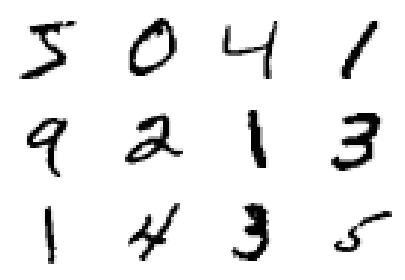

In [5]:
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i], cmap="Greys")
    plt.axis("off")
plt.tight_layout()
plt.show()

The `y` arrays contain labels for the samples contained in `X`.

In [6]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

The simplest way to feed the 28 x 28 images into a neural network is to reshape them to 1D arrays.

In [7]:
X_train = X_train.reshape(60000, 784).astype("float32")
X_valid = X_valid.reshape(10000, 784).astype("float32")

In [8]:
X_train.shape, X_valid.shape

((60000, 784), (10000, 784))

Pixel values are scaled by the max value (255), so that they range from 0 to 1.

In [9]:
X_train = X_train / 255
X_valid = X_valid / 255

Target values are one-hot encoded.

In [10]:
n = 10
y_train = keras.utils.to_categorical(y_train, num_classes=n)
y_valid = keras.utils.to_categorical(y_valid, num_classes=n)

In [11]:
y_train.shape, y_valid.shape

((60000, 10), (10000, 10))

Create a shallow neural network with one hidden layer.

In [12]:
model = Sequential()
model.add(Dense(64, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

The number of parameters in the hidden layer depends on the number of neurons in the hidden layer and in the input layer: $n_{param} = n_{weights} + n_{biases}$.

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Check that the number of parameters make sense.

In [14]:
784 * 64 + 64 # 1 parameter for each of the 784 input neurons * 64 hidden neurons + 64 additional bias terms

50240

In [15]:
64 * 10 + 10 # 1 parameter for each of the 64 hidden layer neurons * 10 output neurons + 10 additional bias terms

650

In [16]:
(784 * 64 + 64) + (64 * 10 + 10) # total number of parameters

50890

Compile the model.

In [17]:
model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01), metrics=["accuracy"])

Fit the model to the training data.

In [18]:
hist_l1 = model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=20,
          verbose=0,
          validation_data=(X_valid, y_valid))

In [38]:
def plot_learning_curves(hist):
    val_loss = hist.history["val_loss"]
    val_accuracy = hist.history["val_accuracy"]
    loss = hist.history["loss"]

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.lineplot(x=range(0,len(val_accuracy)), y=val_accuracy, ax=ax[0], label="Validation Accuracy")
    sns.lineplot(x=range(0,len(val_loss)), y=val_loss, ax=ax[1], label="Validation Loss")
    sns.lineplot(x=range(0,len(loss)), y=loss, ax=ax[1], label="Training Loss")

    ax[0].set_xlabel("# of Epochs")
    ax[1].set_xlabel("# of Epochs")
    
    plt.suptitle("Learning Curves")
    plt.show()

Plot learning history.

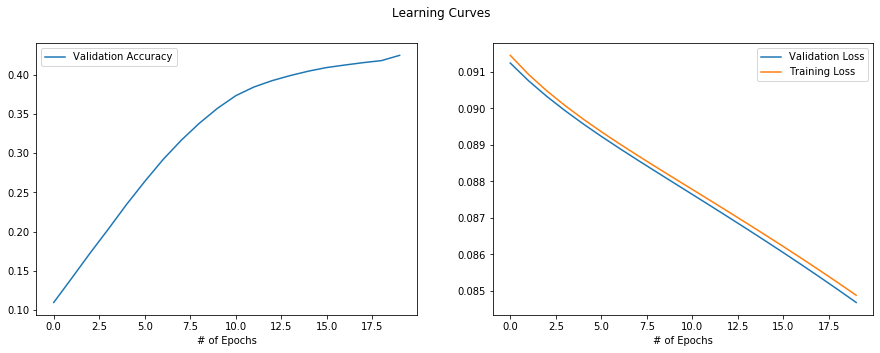

In [39]:
plot_learning_curves(hist_l1)

Final validation score.

In [22]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 13us/step


[0.0846874517917633, 0.424699991941452]

In [ ]:
# model.save("model.hd5")
# model = model.load("model.hd5")

## Experimentation

Experiment with other network configurations.

* Different batch size
* Increased or decreased learning rate
* Change neuron activation functions
* Additional hidden layers

**Batch Size**

In [125]:
batch_sizes = [8, 16, 32, 64, 128, 256]
n_epochs = 50

In [126]:
accuracy = pd.DataFrame(columns=batch_sizes, index=range(n_epochs))
loss = pd.DataFrame(columns=batch_sizes, index=range(n_epochs))
accuracy["Epoch"] = range(n_epochs)
loss["Epoch"] = range(n_epochs)

In [127]:
for batch_size in batch_sizes:
    model = Sequential()
    model.add(Dense(64, activation="sigmoid", input_shape=(784,)))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01), metrics=["accuracy"])
    
    
    hist = model.fit(x=X_train,
              y=y_train,
              batch_size=batch_size,
              epochs=n_epochs,
              verbose=0,
              validation_data=(X_valid, y_valid))
    
    accuracy[batch_size] = hist.history["val_accuracy"]
    loss[batch_size] = hist.history["val_loss"]

In [128]:
accuracy_melt = accuracy.melt(value_name="Accuracy", var_name="Batch Size", id_vars=["Epoch"])
loss_melt = loss.melt(value_name="Loss", var_name="Batch Size", id_vars=["Epoch"])

accuracy_melt["Batch Size"] = accuracy_melt["Batch Size"].astype(object)
loss_melt["Batch Size"] = loss_melt["Batch Size"].astype(object)

In [129]:
#accuracy.to_csv("working/mnist-shallow-net-batch-size-accuracy.csv", index=False)
#loss.to_csv("working/mnist-shallow-net-batch-size-loss.csv", index=False)

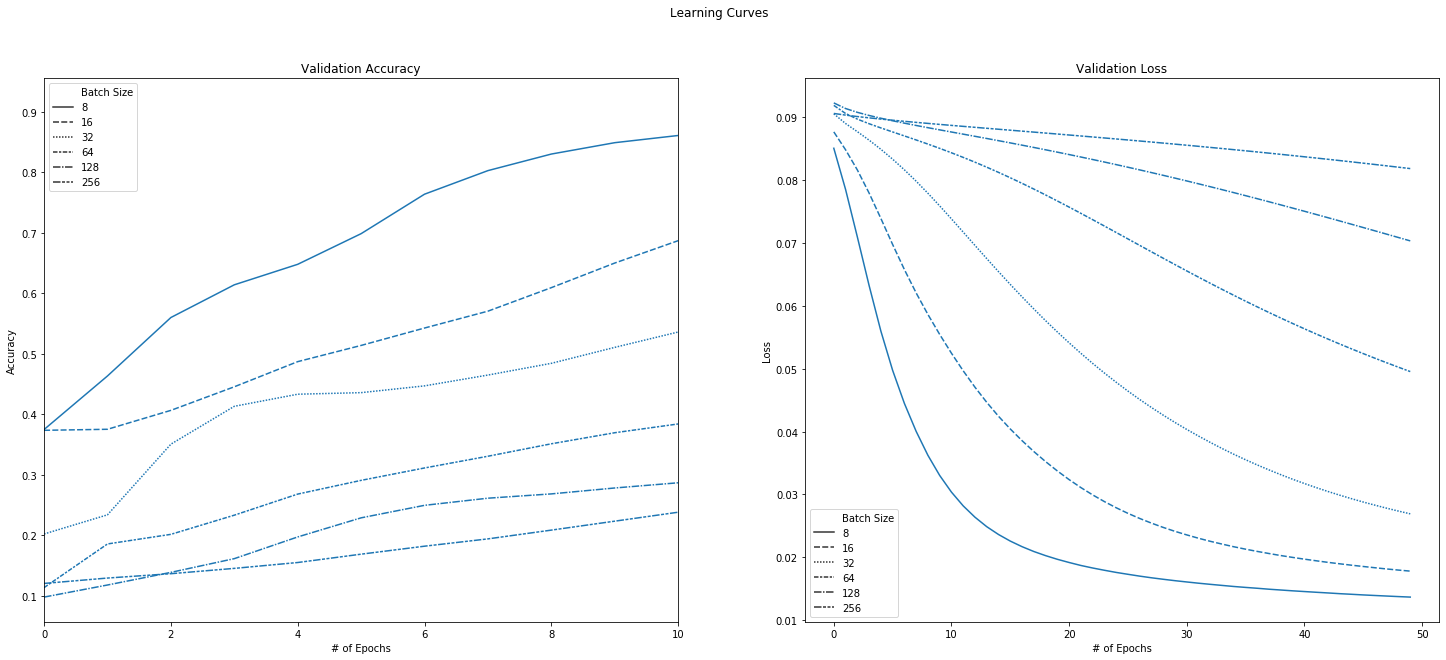

In [130]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

sns.lineplot(x="Epoch", y="Accuracy", style="Batch Size", data=accuracy_melt, ax=ax[0])
sns.lineplot(x="Epoch", y="Loss", style="Batch Size", data=loss_melt, ax=ax[1])

ax[0].set_title("Validation Accuracy")
ax[1].set_title("Validation Loss")

ax[0].set_xlabel("# of Epochs")
ax[1].set_xlabel("# of Epochs")

ax[0].set_xlim([0,10])

plt.suptitle("Learning Curves")
plt.show()

In [24]:
model = Sequential()
model.add(Dense(64, activation="sigmoid", input_shape=(784,)))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01), metrics=["accuracy"])
hist_l2 = model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=50,
          verbose=0,
          validation_data=(X_valid, y_valid))

In [34]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 14us/step


[0.0888938434123993, 0.19949999451637268]

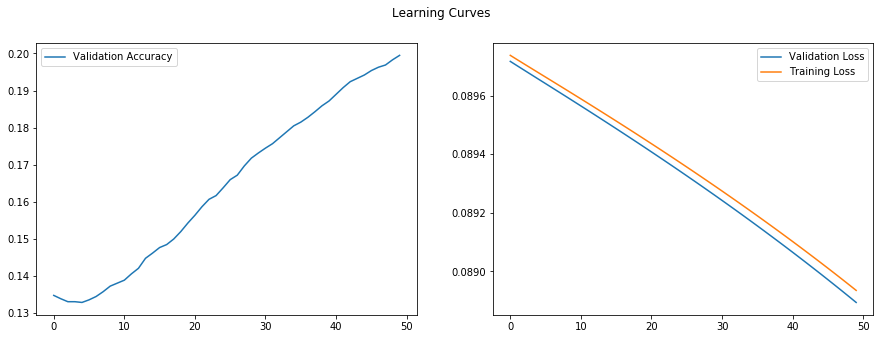

In [35]:
plot_learning_curves(hist_l2)